In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#changing collumns name(rename)
df=df.rename(columns={'Gender':'gender', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

In [5]:
df.shape

(200, 5)

In [6]:
# is there any null value?
#df.isnull().values.any()
df.isna().sum()

CustomerID    0
gender        0
Age           0
income        0
score         0
dtype: int64

In [7]:
df.describe() #everything about the dataset

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


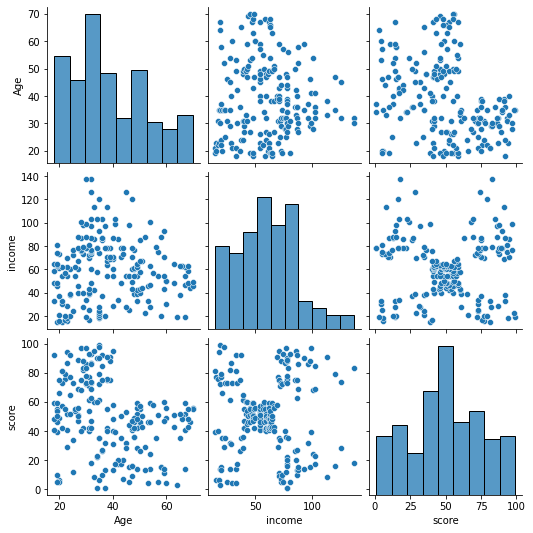

In [10]:
#for unsupervised learning , in this data we have to work with last three collumns
seaborn.pairplot(df[['Age','income','score']])

In [11]:
#k-means cluster importing
import sklearn.cluster as cluster

In [12]:
kmeans=cluster.KMeans(n_clusters=5) #for income and score  or score based on income

In [13]:
kmeans= kmeans.fit(df[['score','income']])

In [14]:
kmeans.cluster_centers_   #to see the centroid or centers of the clusters

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

In [15]:
#creating a new collumn in the dataset to show the cluster results of data
df['income_cluster']= kmeans.labels_

In [16]:
df

,CustomerID,gender,Age,income,score,income_cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [18]:
df['income_cluster'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: income_cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

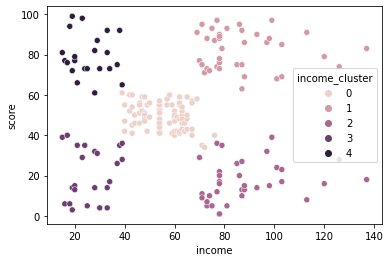

In [20]:
seaborn.scatterplot(x='income',y='score',hue='income_cluster',data=df)

In [21]:
kmeans=cluster.KMeans(n_clusters=2) #for age and score  or score based on age

In [23]:
kmeans= kmeans.fit(df[['score','Age']])

In [24]:
kmeans.cluster_centers_   #to see the centroid or centers of the clusters

array([[32.88695652, 46.16521739],
       [73.62352941, 28.95294118]])

In [25]:
#creating a new collumn in the dataset to show the cluster results of data
df['age_cluster']= kmeans.labels_

In [26]:
df

,CustomerID,gender,Age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,0
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,2,0


In [28]:
df['age_cluster'].value_counts()

0    115
1     85
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='score'>

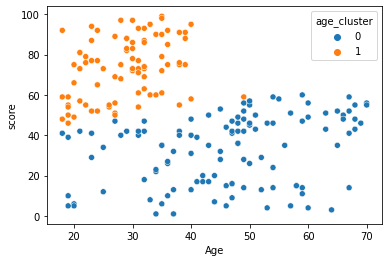

In [29]:
seaborn.scatterplot(x='Age',y='score',hue='age_cluster',data=df)

In [30]:
# to find the optimal number of clusters for any collumns or relation in un supervised data
from sklearn.cluster import KMeans
k_range=range(1,12)

In [31]:
wcss=[]

In [32]:
#loop for wcsss
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

In [33]:
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25061.304119069322, 21900.34135010752, 19669.71099830122, 17593.534034642107]


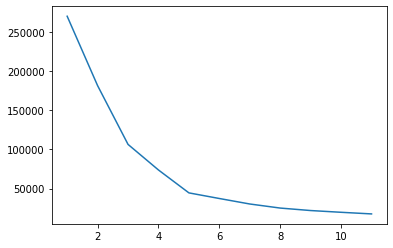

In [34]:
#ploting the wcss and finding the optimal value of clusters 
plt.xlabel=('Number of clusters (K)')
plt.ylabel= ('Sum of squared error')
plt.plot(k_range,wcss)